# Problem :

#### Preforming exploratory data analysis on the `callifornia housing` data set.

# Aim :
* Visualizing statistical relationship from features in the californai housing dataset to again insights on what house feature contributes to it's price.
* Use machine learning to model an application that would be able to predict housing prices when given a set of parameters (based of this data set).

# Data :
#### The data is gotten from the [kaggle website](https://www.kaggle.com/c/californiahousing)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [3]:
file = '../data/california/housing.csv'
!ls {file}

../data/california/housing.csv


In [4]:
df =  pd.read_csv(file, sep=',')

#### Looking at the first five data samples of the data set

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Let's look at some statistical attributes of the dataset

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 1 Before we start visualizing the data, we would like to add some additional features. Looking at the data set we could a two additional columns which would represent ` Number of rooms in each houshold` and `Number of bedrooms in each houshold`.

#### 2 Since countable items do not come in decimal points we would change the data type of the newly created features to type `int`. But before we do that, from the statistical description of the dataset we would notice the `total_bedrooms` count is 20433 from a total count of about 20640 which is about `207` points `missing/not computed` during data collection.


In [8]:
df['bedrooms'] = round(df['total_bedrooms'] / df['households'])
df['rooms'] = round(df['total_rooms'] / df['households'])
df['bedrooms'].fillna(np.median, inplace=True, axis=0)
df['total_bedrooms'].fillna(np.median, inplace=True, axis=0)

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms,rooms
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,NEAR BAY,1,7.0
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,6.0
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,NEAR BAY,1,8.0
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,NEAR BAY,1,6.0
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,NEAR BAY,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374,845.0,330.0,1.5603,78100.0,INLAND,1,5.0
20636,-121.21,39.49,18.0,697.0,150,356.0,114.0,2.5568,77100.0,INLAND,1,6.0
20637,-121.22,39.43,17.0,2254.0,485,1007.0,433.0,1.7000,92300.0,INLAND,1,5.0
20638,-121.32,39.43,18.0,1860.0,409,741.0,349.0,1.8672,84700.0,INLAND,1,5.0


In [10]:
df['total_bedrooms'] = pd.to_numeric(df['total_bedrooms'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
bedrooms              207
rooms                   0
dtype: int64

### Extra feature engineering:
For convinence the median_house name is changed to price, and the median_income would be up scaled to it original values.

In [12]:
df['price'] = df['median_house_value']
df.drop('median_house_value', axis=1,inplace=True) 

In [13]:
df['median_income'] = df['median_income'] * 10000

# Visualization

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms,rooms,price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,1.0,7.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,1.0,6.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,1.0,8.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,1.0,6.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,1.0,6.0,342200.0


#### Let's plot a scatter plot of the `median_income` and the `price`

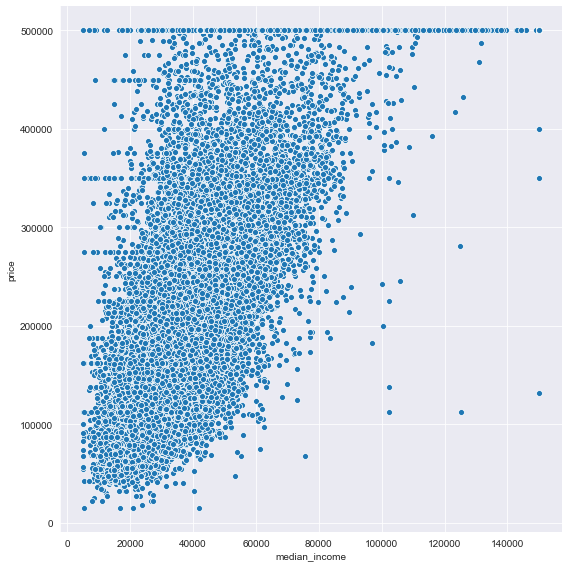

In [15]:
sns.relplot(x='median_income', y='price', data=df, height=8, )
plt.show()

#### From the above graph it indicates that families with a `median_income` below the #8000 mark purchase houses with prices lower than $400000.

#### Let's plot a scatter plot of the `median_income` and the `price` based on `median age`

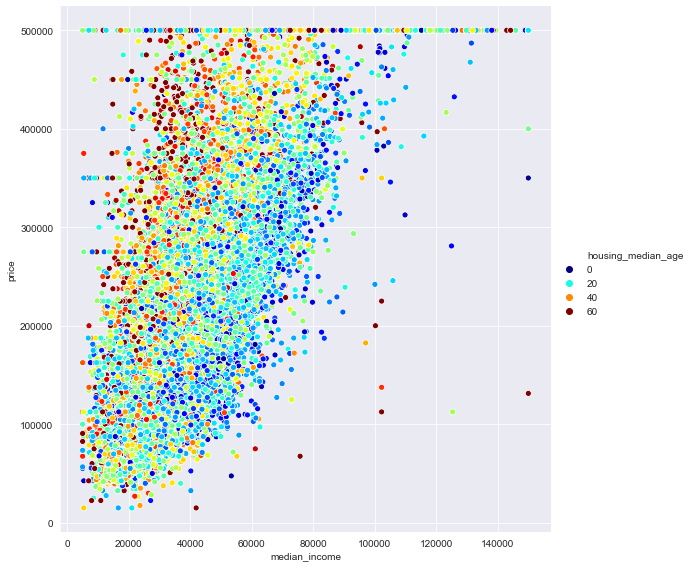

In [16]:
sns.relplot(x='median_income', y='price', data=df, 
            hue='housing_median_age', height=8, palette='jet')
plt.show()

####  The scatter plot shows that age has little influence of income distribution.

#### Let's check out the wealth and `population` distribution

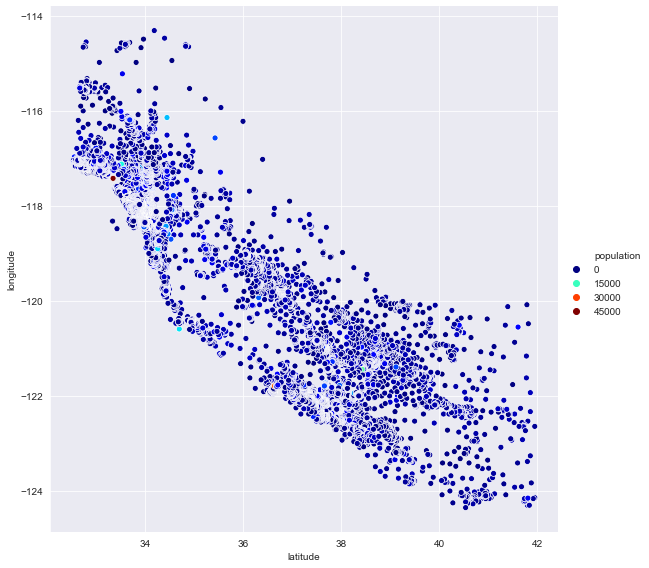

In [17]:
sns.relplot(x='latitude', y='longitude', data=df, 
           hue='population', palette='jet', height=8)
plt.show()

####  The plot shows that californai is sparesly populated, with only one point having a rather heigh `population` cluster. We would further look at how the prices of house a scatter based on location.

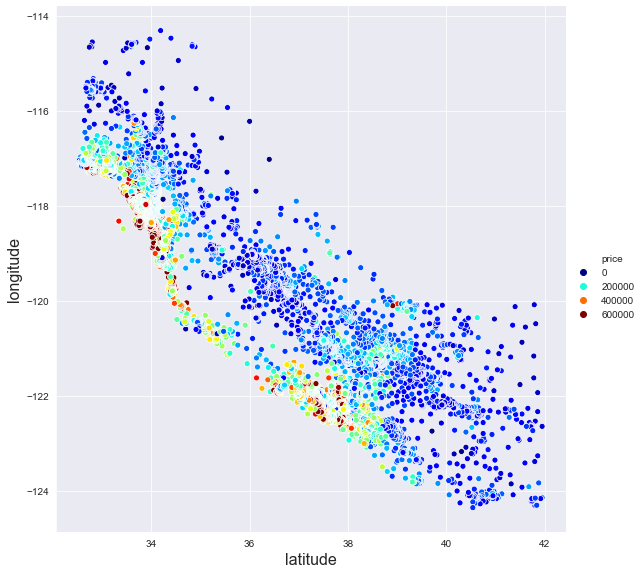

In [18]:
sns.relplot(x='latitude', y='longitude', data=df, 
            hue='price', height=8, palette='jet')
plt.xlabel('latitude',fontsize=16)
plt.ylabel('longitude', fontsize=16)
plt.show()

#### California's wealthy class seems to reside along the costal region on the state. We would then like to plot the relationship between the location and the `median_income` distribution

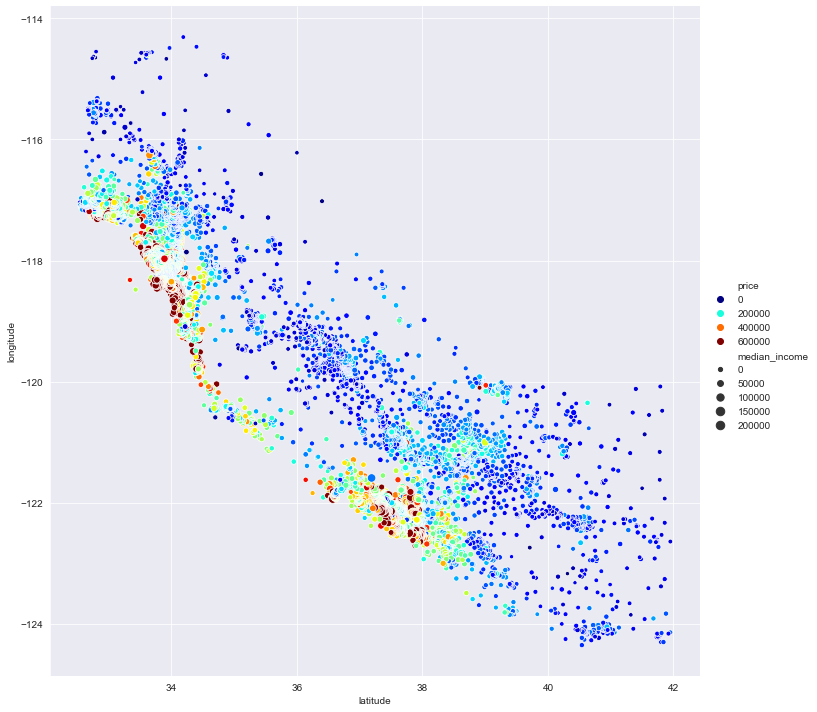

In [19]:
sns.relplot(x='latitude',y='longitude', data=df,
           hue='price' ,size='median_income', palette='jet', height=10)
plt.show()

#### Not many houses earn more than $100000 as their `median_income`

In [20]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms,rooms,price
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,NEAR BAY,1.0,7.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,NEAR BAY,1.0,6.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,NEAR BAY,1.0,8.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,NEAR BAY,1.0,6.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,NEAR BAY,1.0,6.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,INLAND,1.0,5.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,INLAND,1.0,6.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,INLAND,1.0,5.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,INLAND,1.0,5.0,84700.0


####  Does the number of `rooms` have any relationship with the price of the house. let's plot a line graph to check.

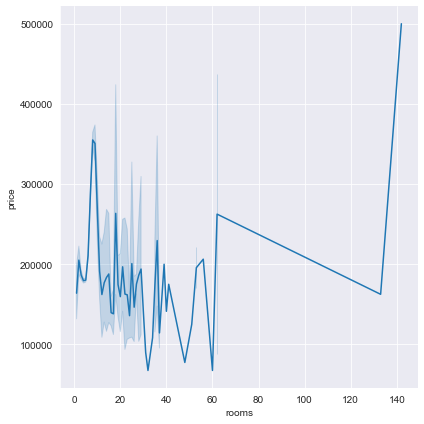

In [21]:
sns.relplot('rooms', 'price', data=df, 
            kind='line', height=6, sort=True)
plt.show()

In [22]:
rooms = df[df['rooms'] <= 20]
df.pivot_table(rooms, 'rooms').iloc[:20,[7]]

,price
rooms,
1.0,163888.888889
2.0,205126.471698
3.0,186454.072134
4.0,179472.321255
5.0,180220.130945
6.0,210968.884630
7.0,286916.428711
8.0,355059.800274
9.0,350634.969072


####  From above the more rooms the less the price of the house except for houses with more than 10 rooms, `Note` : Houses with astronomically high number of rooms should be regarded as this may be hotels or caused by mislabelling of data.
#### houses with `rooms` in the range of 0-20 cost the most.

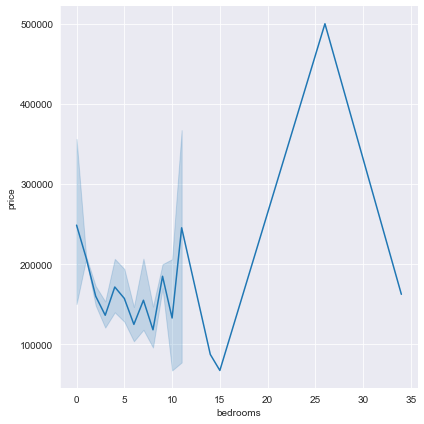

In [23]:
sns.relplot('bedrooms', 'price', data=df,
           height=6, kind='line', sort=True)
plt.show()

In [24]:
rooms = df[df['bedrooms'] <= 20]
df.pivot_table(rooms, 'bedrooms').iloc[:12, [6]]

,price
bedrooms,
0.0,248750.166667
1.0,208099.650708
2.0,160180.545198
3.0,136372.580645
4.0,171614.250000
5.0,157345.833333
6.0,124975.000000
7.0,155100.000000
8.0,118220.000000


####  From above the more bedrooms the less the price of the house except for houses with more than 10 bedrooms, `Note`: Houses wit astronomically high number of bedrooms should be regarded as this may be hotels or caused by mislabelling of data.

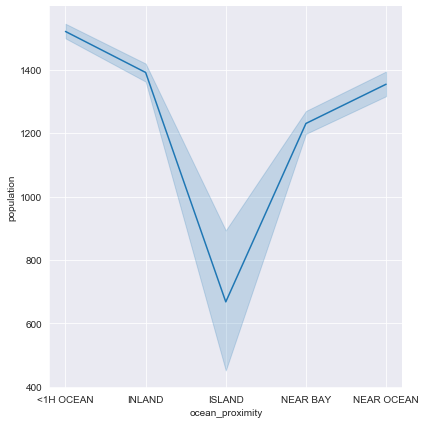

In [25]:
sns.relplot('ocean_proximity', 'population', data=df, 
            kind='line', sort=True,
            height=6, palette='jet')
plt.show()

####  Population distribution of California's per-region, less have island houses, most live around `<1H ocean` region 

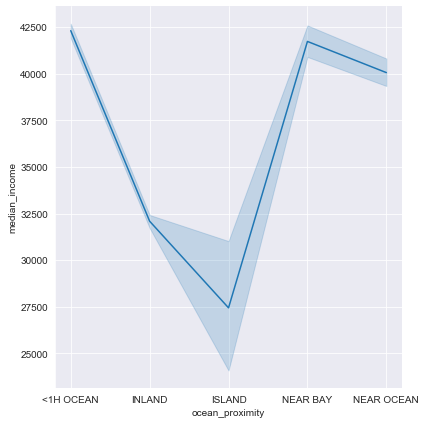

In [26]:
sns.relplot('ocean_proximity', 'median_income', data=df,
           kind='line', sort=True, height=6, palette='jet')
plt.show()

#### `Island` dwellers have the lowest `median_income` rates, while `<1H ocean` have a very high `median_income` rate.

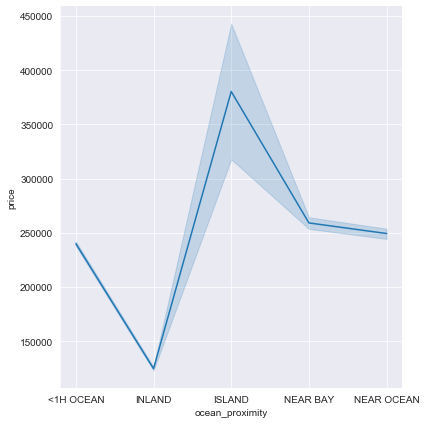

In [27]:
sns.relplot('ocean_proximity', 'price', data=df,
           kind='line', sort=True, height=6, palette='jet')
plt.show()

#### `Island`houses have the highest `price` rates, while `Inland` house `price` are of very low  rate. 

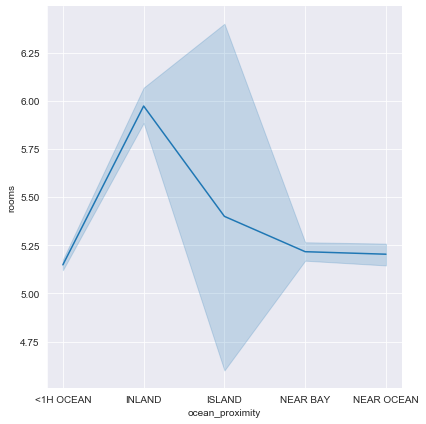

In [28]:
sns.relplot('ocean_proximity', 'rooms', data=df,
           kind='line', sort=True, height=6, palette='jet')
plt.show()

#### `Inland` houses have the highest number of `rooms`.

In [ ]:
sns.relplot('ocean_proximity', 'housing_median_age', data=df,
           kind='line', sort=True, height=6, palette='jet')
plt.show()

#### `Island`houses have the highest `housing median age`, while `Inland` houses have a `housing_median_age` of `25`. 

In [ ]:
sns.relplot('ocean_proximity', 'bedrooms', data=df,
           kind='line', sort=True, height=6, palette='jet')
plt.show()

#### `Island`houses have the highest number of `bedrooms`, while `<1H Ocean` and ` Near Bay` have only `1` room. 